# Hebbian to implement PCA

In [1]:
import numpy as np
import matplotlib.pylab as plt

### Generate Data

In [2]:
def generate_data(samples=1000):
    mean = [0, 0]
    cov = [[3, 2],[2, 2]]
    data = np.random.multivariate_normal(mean, cov, samples)
    return data

### Network

In [3]:
class LinearNeuronHebbian:
    def __init__(self, input_dim, learning_rate=0.01):
        self.weights = np.random.randn(input_dim)
        self.lr = learning_rate

    def train(self, data, epochs=1):
        for _ in range(epochs):
            for x in data:
                x = x.reshape(-1)
                y = np.dot(self.weights, x)
                self.weights += self.lr * y * x

### Train & Test

In [4]:
data = generate_data()
input_dim = data.shape[1]
learning_rate = 0.01

neuron = LinearNeuronHebbian(input_dim, learning_rate)

epochs = 10
neuron.train(data, epochs)

### PCA

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(data)

principal_component = pca.components_[0]

wght_norm = neuron.weights / np.linalg.norm(neuron.weights)
pc_norm = principal_component / np.linalg.norm(principal_component)

print("Normalized Neuron Weights (Hebbian):", wght_norm)
print("Normalized Principal Component (PCA):", pc_norm)

Normalized Neuron Weights (Hebbian): [-0. -0.]
Normalized Principal Component (PCA): [0.79613836 0.60511463]


### Plots

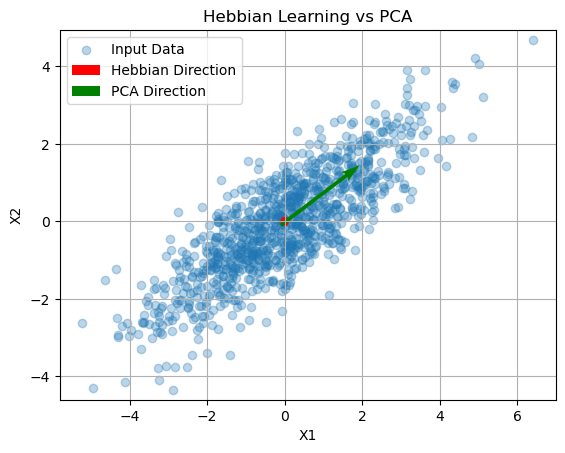

In [6]:
plt.scatter(data[:, 0], data[:, 1], alpha=0.3, label="Input Data")
plt.quiver(
    0.001,
    0.001,
    wght_norm[0],
    wght_norm[1],
    color="r",
    scale=5,
    width=0.02,
    label="Hebbian Direction",
)
plt.quiver(
    -0.1,
    -0.1,
    pc_norm[0],
    pc_norm[1],
    color="g",
    scale=5,
    label="PCA Direction",
)
plt.legend()
plt.title("Hebbian Learning vs PCA")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid()
plt.axis("equal")
plt.show()